In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "/Users/marchen/Desktop/programming/AI/Fifth week/file/diabetes.csv"
df = pd.read_csv(file_path)

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df = df.drop(columns = ['Outcome'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
# 결측치 제거
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [24]:
X = df.drop('BMI', axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [25]:
y = df['BMI']
y.value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [26]:
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [27]:
# 원-핫 인코딩

Y = pd.get_dummies(y).values
X = X.values

In [28]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [29]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 43)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((537, 7), (537, 248), (231, 7), (231, 248))

In [32]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/Users/marchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,751 (6.84 KB)

 Trainable params: 1,751 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8327 - mse: 8.8327 - val_loss: 1.7525 - val_mse: 1.7525
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4013 - mse: 1.4013 - val_loss: 9.8798 - val_mse: 9.8798
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7514 - mse: 2.7514 - val_loss: 0.5613 - val_mse: 0.5613
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.6293 - val_mse: 0.6293
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6172 - mse: 0.6172 - val_loss: 0.3569 - val_mse: 0.3569
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3583 - mse: 0.3583 - val_loss: 0.5403 - val_mse: 0.5403
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6625 - mse: 0.6625 - val_loss: 0.4919 - val_mse: 0.4919
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2604 - mse: 0.2604 - val_loss: 3.6922 - val_mse: 3.6922
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7390 - mse: 

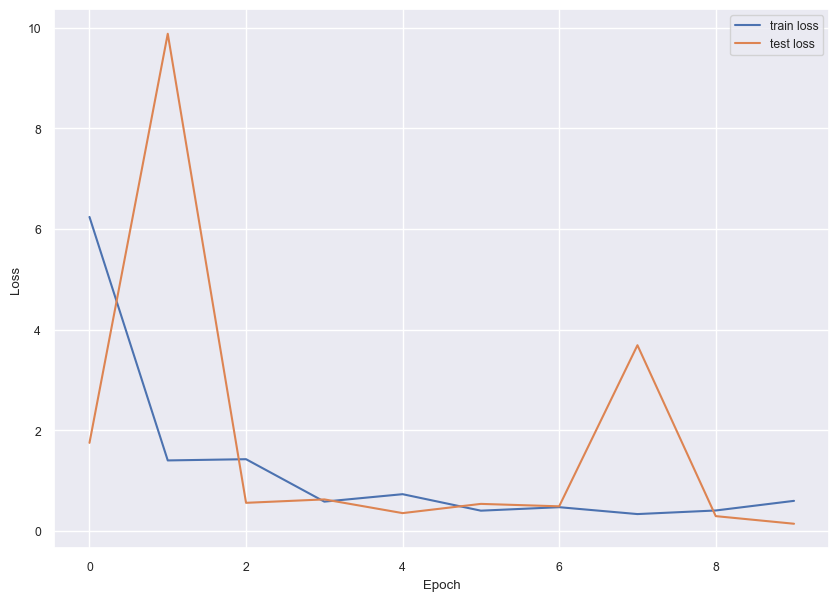

In [34]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

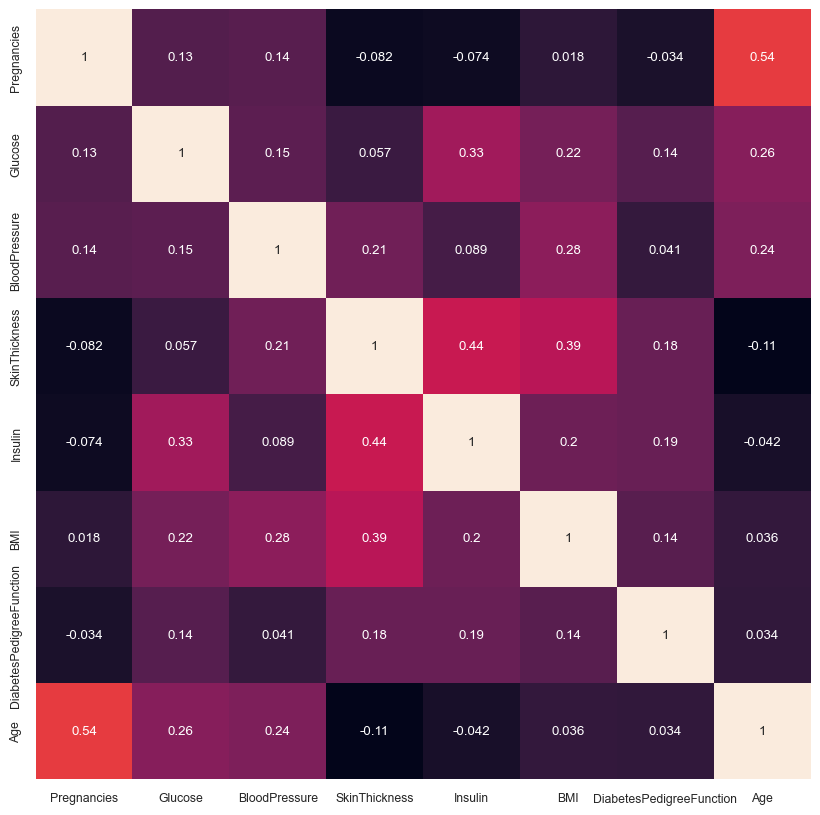

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [36]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1948 - mse: 0.1948 


[0.14562402665615082, 0.14562402665615082]